## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_results_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_group_df = mouse_results_df.groupby(["Mouse ID", "Timepoint"]).count()
mouse_group_df.loc[mouse_group_df["Drug Regimen"]>1, :]

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results_df.loc[mouse_results_df["Mouse ID"]=="g989", :]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexes_to_drop = mouse_results_df[mouse_results_df["Mouse ID"]=="g989"].index

mouse_results_df.drop(indexes_to_drop, inplace=True)

In [45]:
# Checking the number of mice in the clean DataFrame.

mouse_results_df["Mouse ID"].nunique()

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_group = mouse_results_df.groupby(["Drug Regimen"])


#Find the mean tumor volume for each regimen
mouse_mean_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].mean())
mouse_mean_df = mouse_mean_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Mean"})
mouse_mean_df = mouse_mean_df.reset_index()

#Find the median tumor volume for each regimen
mouse_median_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].median())
mouse_median_df = mouse_median_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume Median"})
mouse_median_df = mouse_median_df.reset_index()

#Find the variance tumor volume for each regimen
mouse_variance_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].var())
mouse_variance_df = mouse_variance_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
mouse_variance_df = mouse_variance_df.reset_index()

#Find the standard deviation tumor volume for regimen
mouse_stdev_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].std())
mouse_stdev_df = mouse_stdev_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Standard Deviation"})
mouse_stdev_df = mouse_stdev_df.reset_index()


#Find the SEM tumor volume for each regimen
mouse_sem_df = pd.DataFrame(mouse_group["Tumor Volume (mm3)"].sem())
mouse_sem_df = mouse_sem_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM"})
mouse_sem_df = mouse_sem_df.reset_index()

summary_df = mouse_mean_df.merge(mouse_median_df, how="outer", on="Drug Regimen")
summary_df = summary_df.merge(mouse_variance_df, how="outer", on="Drug Regimen")
summary_df = summary_df.merge(mouse_stdev_df, how="outer", on="Drug Regimen")
summary_df = summary_df.merge(mouse_sem_df, how="outer", on="Drug Regimen")


summary_df = summary_df.set_index("Drug Regimen")
summary_df

,Tumor Volume Mean,Median Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

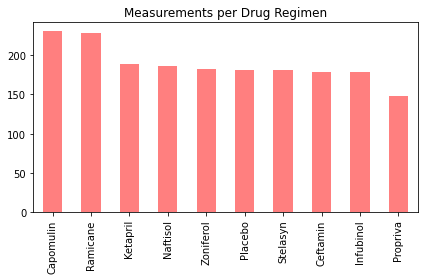

In [47]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_counts_df = pd.DataFrame(mouse_results_df["Drug Regimen"].value_counts())

drug_counts_df.plot(kind="bar", color="r", alpha=0.5, align="center", legend=False, width=.5)

plt.title("Measurements per Drug Regimen")
plt.tight_layout()
plt.show()

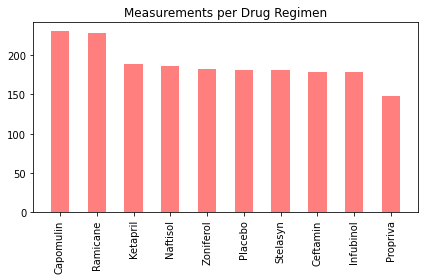

In [48]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = drug_counts_df.index

plt.bar(x_axis, drug_counts_df["Drug Regimen"], color="r", alpha=0.5, align = "center", width=.5)

plt.title("Measurements per Drug Regimen")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

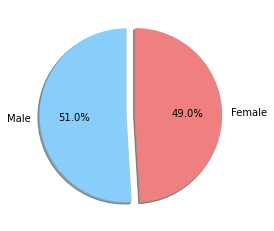

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(mouse_results_df["Sex"].value_counts())
colors = ["lightskyblue", "lightcoral"]
explode = (0.1, 0)

gender_df.plot(kind="pie", y="Sex", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90, legend=False)
plt.axis("off")
plt.show()

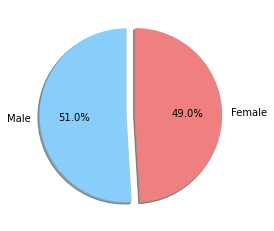

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_df.index
counts = gender_df["Sex"]

plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("off")
plt.show()


## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_results_df = mouse_results_df.loc[(mouse_results_df["Drug Regimen"]=="Capomulin") 
                                          | (mouse_results_df["Drug Regimen"]=="Ramicane")
                                          | (mouse_results_df["Drug Regimen"]=="Infubinol")
                                          | (mouse_results_df["Drug Regimen"]=="Ceftamin")
                                          ,:]

# Start by getting the last (greatest) timepoint for each mouse
regimen_group = regimen_results_df.groupby(["Mouse ID"])
regimen_group_df = pd.DataFrame(regimen_group["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimen_results_df = regimen_results_df.merge(regimen_group_df, how="inner", on=["Mouse ID", "Timepoint"])

regimen_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = regimen_results_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
tumor_volumes = []
ticks = []
tick = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tick += 1
    ticks.append(tick)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = regimen_results_df.loc[regimen_results_df["Drug Regimen"]==treatment, :]
    tumor_volume = treatment_df["Tumor Volume (mm3)"]
   
    # add subset 
    tumor_volumes.append(tumor_volume)
    
    #Calculte Quartiles and IQR
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq   
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #Print Calculations for each treatment    
    print(f"{treatment} treatment results:")
    print(f"  The lower quartile of tumor volumes is: {lowerq}")
    print(f"  The upper quartile of tumor volumes is: {upperq}")
    print(f"  The interquartile range of tumor volumes is: {iqr}")
    print(f"  The median of tumor volumes is: {quartiles[0.5]}")
    print()
    print(f"  Values below {lower_bound} could be outliers.")
    print(f"  Values above {upper_bound} could be outliers.")
    print()
    print()

    

Ramicane treatment results:
  The lower quartile of tumor volumes is: 31.56046955
  The upper quartile of tumor volumes is: 40.65900627
  The interquartile range of tumor volumes is: 9.098536719999998
  The median of tumor volumes is: 36.56165229

  Values below 17.912664470000003 could be outliers.
  Values above 54.30681135 could be outliers.


Capomulin treatment results:
  The lower quartile of tumor volumes is: 32.37735684
  The upper quartile of tumor volumes is: 40.1592203
  The interquartile range of tumor volumes is: 7.781863460000004
  The median of tumor volumes is: 38.125164399999996

  Values below 20.70456164999999 could be outliers.
  Values above 51.83201549 could be outliers.


Infubinol treatment results:
  The lower quartile of tumor volumes is: 54.04860769
  The upper quartile of tumor volumes is: 65.52574285
  The interquartile range of tumor volumes is: 11.477135160000003
  The median of tumor volumes is: 60.16518046

  Values below 36.83290494999999 could be outl

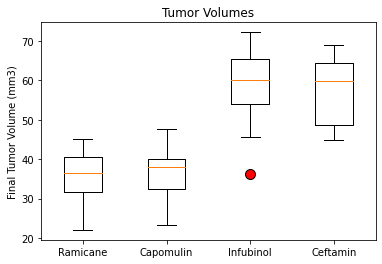

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title(f'Tumor Volumes')
ax1.set_ylabel('Final Tumor Volume (mm3)')

flierprops = dict(marker='o', markerfacecolor='r', linestyle='none', markersize=10)
ax1.boxplot(tumor_volumes, flierprops=flierprops)
plt.xticks(ticks,treatments)
plt.show()


## Line and Scatter Plots

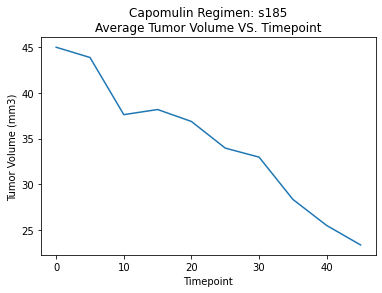

In [97]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_results_df = mouse_results_df.loc[(mouse_results_df["Drug Regimen"]=="Capomulin"),:]
mouse = "s185"
s185_results_df = mouse_results_df.loc[(mouse_results_df["Mouse ID"]==mouse),:]

x_axis = s185_results_df["Timepoint"]
y_axis = s185_results_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title(f"Capomulin Regimen: {mouse}\nAverage Tumor Volume VS. Timepoint")
plt.show()

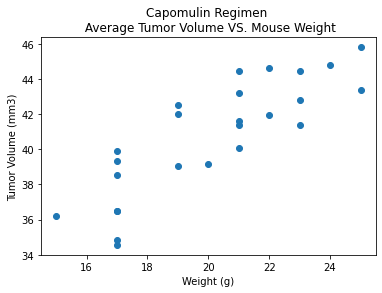

In [98]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_group = capomulin_results_df.groupby(["Mouse ID"])

capomulin_mean_df = pd.DataFrame(capomulin_group["Tumor Volume (mm3)"].mean())
capomulin_weight_df = pd.DataFrame(capomulin_group["Weight (g)"].max())

capomulin_summary_df = capomulin_mean_df.merge(capomulin_weight_df, how="inner", on="Mouse ID")

x_axis = capomulin_summary_df["Weight (g)"]
y_axis= capomulin_summary_df["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Regimen \n Average Tumor Volume VS. Mouse Weight")
plt.show()

## Correlation and Regression

In [101]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between Tumor Volume and Weight is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

The correlation coefficient between Tumor Volume and Weight is 0.84


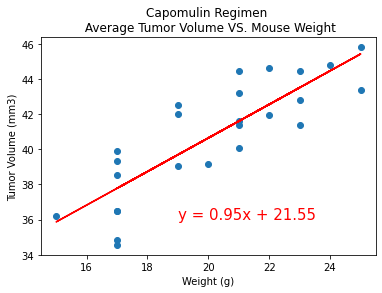

In [100]:
#Linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

#y=mx+b
regress_values = x_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Regimen \n Average Tumor Volume VS. Mouse Weight")
plt.show()

## Observations and Insights 